In [1]:
import pandas as pd

#Loading the full dataset
df = pd.read_csv("bmw_car_salesfull.csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [2]:
#Checking basic info (data types, column count,etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [3]:
#Confirming for no missing values per column
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [4]:
#Checking for unique values in each category
for col in ['Model', 'Year', 'Region', 'Fuel_Type', 'Transmission', 'Color']:
    print(f"{col}: {df[col].nunique()} unique values")

Model: 11 unique values
Year: 15 unique values
Region: 6 unique values
Fuel_Type: 4 unique values
Transmission: 2 unique values
Color: 6 unique values


In [5]:
#Stripping extra spaces and standardizing text capitalization
df['Model'] = df['Model'].str.strip()
df['Region'] = df['Region'].str.title().str.strip()
df['Fuel_Type'] = df['Fuel_Type'].str.title().str.strip()
df['Transmission'] = df['Transmission'].str.title().str.strip()
df['Color'] = df['Color'].str.title().str.strip()

In [ ]:
#Verifying consistency after cleaning by seeing the list of categories
print("Regions:", df['Region'].unique())
print("Fuel Types:", df['Fuel_Type'].unique())
print("Transmissions:", df['Transmission'].unique())


Regions: ['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']
Fuel Types: ['Petrol' 'Hybrid' 'Diesel' 'Electric']
Transmissions: ['Manual' 'Automatic']


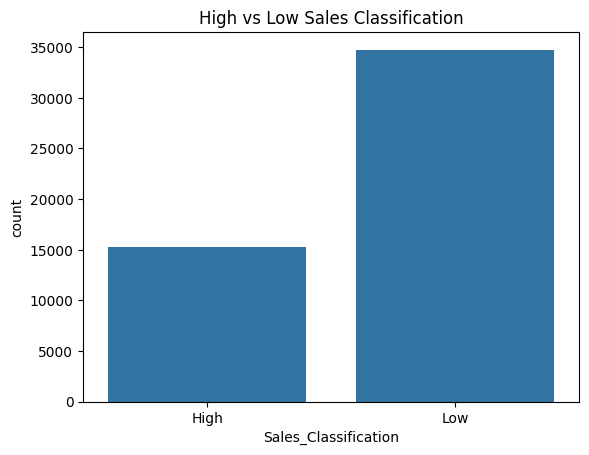

In [9]:
#Preview of Sales Classification Balance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sales_Classification', data=df)
plt.title("High vs Low Sales Classification")
plt.show()

Interpretation of the Countplot

Class 'Low' has a significantly higher count than class 'High' meaning that the data is imbalanced. 

In [10]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Show column names
print(numeric_df.columns.tolist())

['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']


In [11]:
# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Show correlation with Sales_Volume
print(correlation_matrix['Sales_Volume'].sort_values(ascending=False))

Sales_Volume     1.000000
Year             0.001671
Mileage_KM       0.001434
Price_USD        0.000080
Engine_Size_L   -0.003942
Name: Sales_Volume, dtype: float64


Correlations with Sales_Volume

Year
Correlation = 0.0017
Interpretation = Very weak (almost no) relationship — the model year doesn’t meaningfully affect sales volume.

Mileage_KM
Correlation = 0.0014
Interpretation = Again, nearly no correlation — mileage doesn't seem to impact how many units are sold.

Price_USD
Correlation = 0.00008
Interpretation = No Correlation

Engine_Size_L
Correlation = -0.0039
Interpretation = Slightly negative but still basically no relationship.


C:\Users\Nana Ama\AppData\Local\Temp\ipykernel_33116\3823663426.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sales_Volume', y='Model', data=df, estimator=sum, ci=None, order=df.groupby('Model')['Sales_Volume'].sum().sort_values().index)


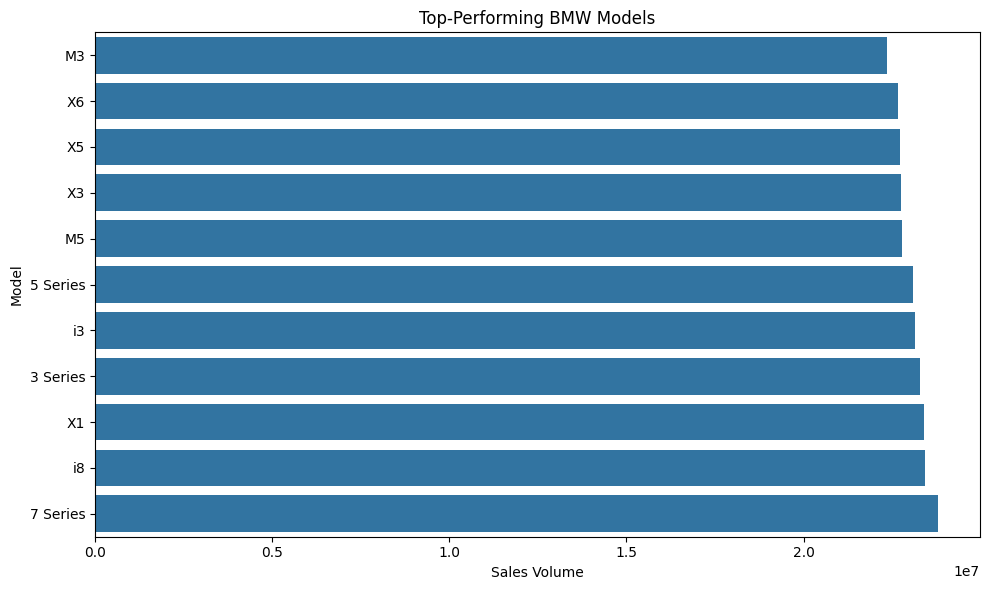

In [15]:
#Plotting a bar chart to find Sales_Volume by Model
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales_Volume', y='Model', data=df, estimator=sum, ci=None, order=df.groupby('Model')['Sales_Volume'].sum().sort_values().index)
plt.title("Top-Performing BMW Models")
plt.xlabel("Sales Volume")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

This chart shows a clear comparison across all BMW models. 

Which BMW model sells the most overall or are the most popular?

1. The BMW 7 Series, i8, and X1 recorded the highest total sales volumes, indicating strong customer preference for luxury sedans and compact SUVs.

2. Overall, sales are fairly distributed across most models, with no single model overwhelmingly dominating the market.

C:\Users\Nana Ama\AppData\Local\Temp\ipykernel_33116\2103168484.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sales_Volume', y='Region', data=df, estimator=sum, ci=None,


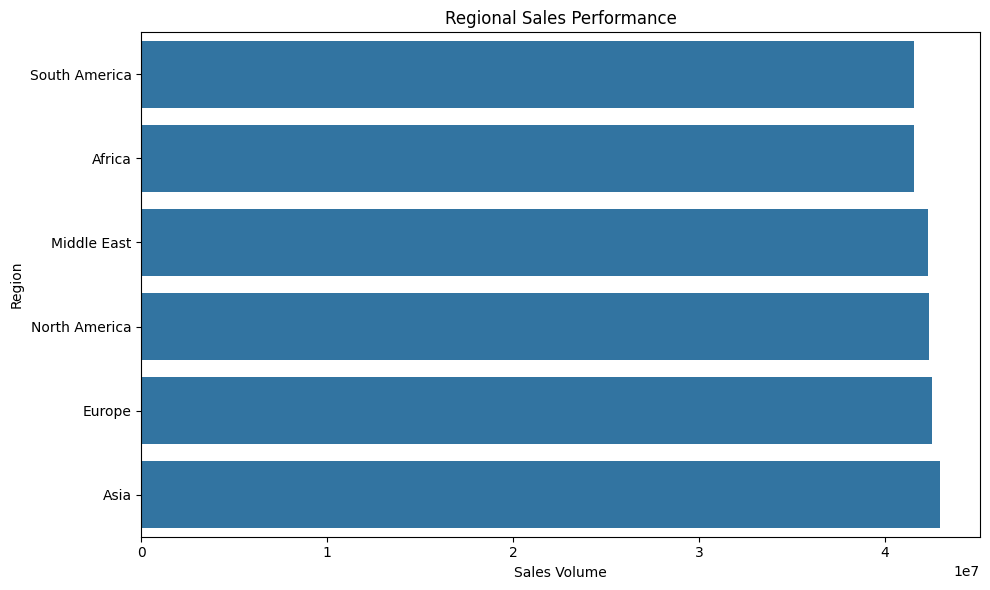

In [14]:
#Plotting a bar chart to find Sales_Volume by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales_Volume', y='Region', data=df, estimator=sum, ci=None,
            order=df.groupby('Region')['Sales_Volume'].sum().sort_values().index)
plt.title("Regional Sales Performance")
plt.xlabel("Sales Volume")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

This chart identifies the strongest markets. 

Which region drives the highest total sales?

1. This distribution suggests BMW has strong market penetration across all regions, with particularly strong demand in Asia and Europe.

2. South America and Africa showed relatively lower volumes but still contributed meaningfully to global sales.

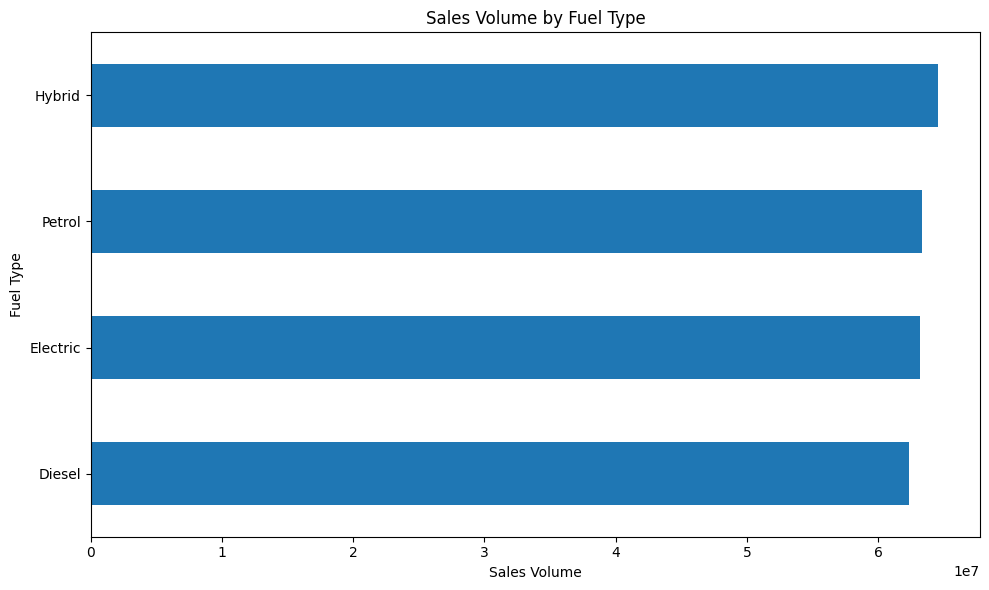

In [19]:
#Plotting a bar chart to find Sales_Volume by Fuel_type
import matplotlib.pyplot as plt

# Group by Fuel_Type and sum the Sales_Volume
fuel_sales = df.groupby('Fuel_Type')['Sales_Volume'].sum().sort_values()

# Plotting
plt.figure(figsize=(10,6))
fuel_sales.plot(kind='barh')
plt.title('Sales Volume by Fuel Type')
plt.xlabel('Sales Volume')
plt.ylabel('Fuel Type')
plt.tight_layout()
plt.show()

Insights from this Chart

1. Hybrid leads in total sales volume, indicating strong consumer preference—possibly due to its balance between fuel efficiency and eco-friendliness.

2. Petrol follows closely, suggesting it remains a widely accepted traditional fuel choice.

3. Electric cars have notable sales, reflecting growing interest in sustainable mobility.

4. Diesel has the lowest sales among the four, possibly due to environmental concerns and shifting regulations.

The relatively close margins between all four fuel types imply that BMW customers are distributed across various energy preferences—making it essential for BMW to maintain a diversified fuel strategy.

C:\Users\Nana Ama\AppData\Local\Temp\ipykernel_33116\3089864937.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transmission', y='Sales_Volume', data=df, estimator=sum, ci=None)


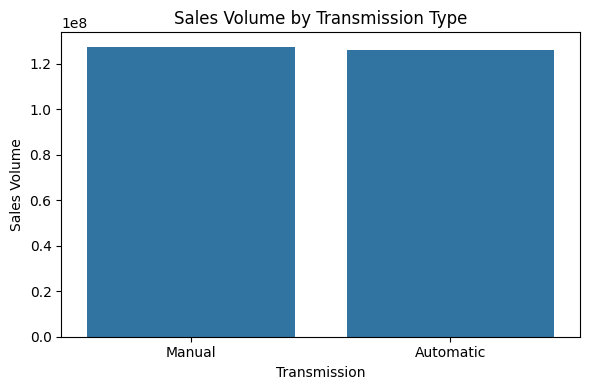

In [18]:
#Plotting a bar chart to find Sales_Volume by Transmission
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x='Transmission', y='Sales_Volume', data=df, estimator=sum, ci=None)
plt.title('Sales Volume by Transmission Type')
plt.ylabel('Sales Volume')
plt.xlabel('Transmission')
plt.tight_layout()
plt.show()

Insights from this Chart

1. Manual transmission vehicles had a slightly higher total sales volume than automatic transmission vehicles.

2. The small difference implies transmission type may not be a major driver of sales performance, but could still be a factor in certain markets or models.

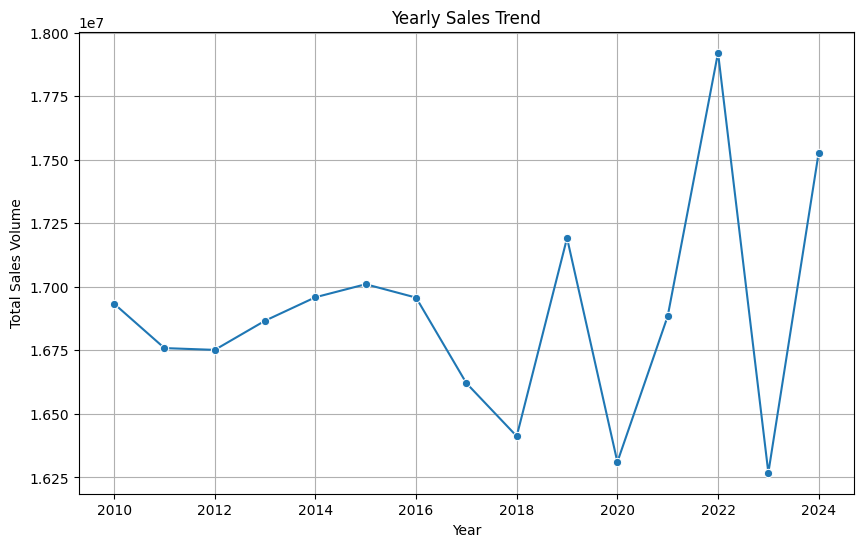

In [23]:
#Sales Trend Over Time (by Year)
sales_by_year = df.groupby('Year')['Sales_Volume'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year, x='Year', y='Sales_Volume', marker='o')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.grid(True)
plt.show()

Insights from this Chart

1. Sales volume has fluctuated over the years, revealing insights into market trends and demand cycles.

2. Peak sales occurred in 2022, possibly influenced by new model launches, economic growth, or marketing efforts.

3. Dips are observed in 2018, 2020 with the lowest recorded in 2023, which may reflect supply chain issues, market saturation, or economic downturns.

The overall trend helps identify strong-performing years and periods that may require strategic improvement or deeper investigation.

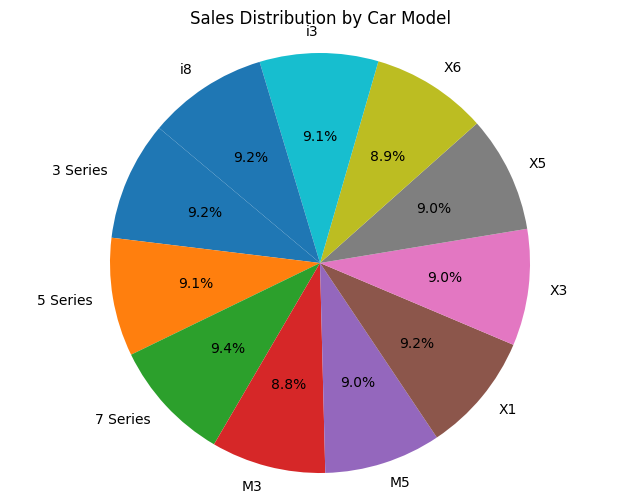

In [26]:
# Group sales by car model
model_sales = df.groupby('Model')['Sales_Volume'].sum()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(model_sales, labels=model_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Car Model')
plt.axis('equal')
plt.show()


Same Insights from Top-Performing BMW Models to be used

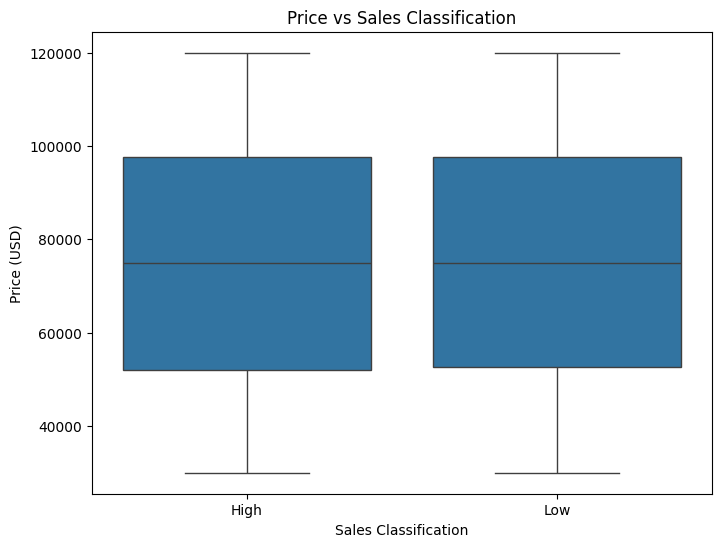

In [27]:
#Plotting a boxplot to visually compare how car prices differ between high and low sales categories
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sales_Classification', y='Price_USD', data=df)
plt.title("Price vs Sales Classification")
plt.xlabel("Sales Classification")
plt.ylabel("Price (USD)")
plt.show()

Insight from the Chart

Car prices do not appear to influence sales classification.
The distribution of prices is nearly identical for both high and low sales categories — same median, range, and spread.
This suggests that price alone may not be a significant factor in determining whether a car model falls into a high or low sales category.

This is a key finding because we often assume cheaper cars sell better.

Checking mileage vs sales classification because
1. Cars with lower mileage might be seen as “newer” or better maintained, possibly making them more desirable and contributing to higher sales
2.  If higher mileage cars consistently show up in one class (e.g., low sales), it may suggest that buyers prefer newer or less-used models.

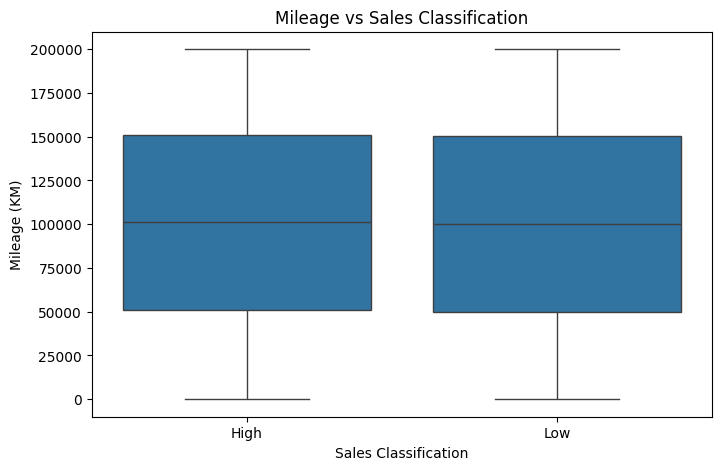

In [ ]:
#Plotting a boxplot to visually compare how mileage differ between high and low sales categories
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Sales_Classification', y='Mileage_KM', data=df)
plt.title('Mileage vs Sales Classification')
plt.xlabel('Sales Classification')
plt.ylabel('Mileage (KM)')
plt.show()

There’s no significant difference in price or mileage between cars classified as High or Low sales. 
Checking Engine size vs sales classification. 

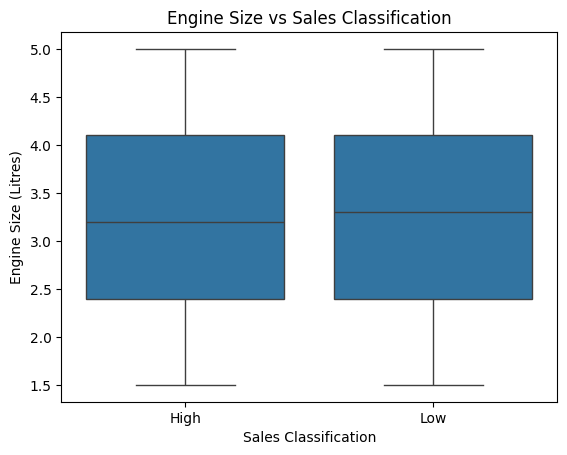

In [29]:
#Plotting a boxplot to visually compare how engine size differ between high and low sales categories
sns.boxplot(x='Sales_Classification', y='Engine_Size_L', data=df)
plt.title("Engine Size vs Sales Classification")
plt.xlabel("Sales Classification")
plt.ylabel("Engine Size (Litres)")
plt.show()


Insight: Engine Size vs Sales Classification

1. Both High and Low sales categories have almost identical distributions in terms of engine size.

2. The median engine size for the Low sales group is slightly higher, but:

3. Min, max, and overall range are virtually the same.

This suggests that engine size doesn’t strongly influence whether a model falls into the high or low sales category.